In [30]:
from __future__ import division

In [29]:
x_a = 974
n_a = 10072
x_b = 1242
n_b = 9886

In [32]:
p_pooled = (x_a + x_b) / (n_a + n_b)
p_pooled

0.11103316965627819

In [33]:
from math import sqrt
se_pooled = sqrt(p_pooled * (1 - p_pooled) * (1 / n_a + 1 / n_b))
se_pooled

0.004447945883692886

In [34]:
d = (x_b / n_b) - (x_a / n_a)
d

0.028928474040117697

In [35]:
alpha = 0.05

In [36]:
from scipy.stats import norm
z_score = norm.ppf(1 - alpha / 2)
z_score

1.959963984540054

In [38]:
confidence = (d - z_score * se_pooled, d + z_score * se_pooled)
confidence

(0.020210660302896456, 0.037646287777338937)

In [39]:
d_min = 0.02

In [1]:
import numpy as np

In [2]:
count_data = np.loadtxt("data/txtdata.csv")

In [3]:
count_data

array([ 13.,  24.,   8.,  24.,   7.,  35.,  14.,  11.,  15.,  11.,  22.,
        22.,  11.,  57.,  11.,  19.,  29.,   6.,  19.,  12.,  22.,  12.,
        18.,  72.,  32.,   9.,   7.,  13.,  19.,  23.,  27.,  20.,   6.,
        17.,  13.,  10.,  14.,   6.,  16.,  15.,   7.,   2.,  15.,  15.,
        19.,  70.,  49.,   7.,  53.,  22.,  21.,  31.,  19.,  11.,  18.,
        20.,  12.,  35.,  17.,  23.,  17.,   4.,   2.,  31.,  30.,  13.,
        27.,   0.,  39.,  37.,   5.,  14.,  13.,  22.])

In [4]:
import pymc as pm

In [5]:
alpha = 1. / count_data.mean() # the Exponential hyperparam

lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=len(count_data))

In [6]:
print lambda_1.random()
print lambda_2.random()
print tau.random()

4.5962767773
47.6979456299
12


In [7]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    # Stepwise function to calculate overall lambda
    out = np.zeros(len(count_data))
    out[:tau] = lambda_1 # Step 1, lambda before tau is lambda1
    out[tau:] = lambda_2 # Step 2, lambda after tau (inclusive) is lambda2
    return out

In [8]:
lambda_.value

array([  4.59627678,   4.59627678,   4.59627678,   4.59627678,
         4.59627678,   4.59627678,   4.59627678,   4.59627678,
         4.59627678,   4.59627678,   4.59627678,   4.59627678,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69794563,
        47.69794563,  47.69794563,  47.69794563,  47.69

In [9]:
print "lamba_1: %f, lamba_2: %f" % (lambda_1.value, lambda_2.value)

lamba_1: 4.596277, lamba_2: 47.697946


In [10]:
print "lamba_1: %f, lamba_2: %f" % (lambda_1.random(), lambda_2.random())
print "lamba_1: %f, lamba_2: %f" % (lambda_1.value, lambda_2.value)

lamba_1: 0.268647, lamba_2: 17.657082
lamba_1: 0.268647, lamba_2: 17.657082


In [11]:
lambda_.value

array([  0.26864749,   0.26864749,   0.26864749,   0.26864749,
         0.26864749,   0.26864749,   0.26864749,   0.26864749,
         0.26864749,   0.26864749,   0.26864749,   0.26864749,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65708174,
        17.65708174,  17.65708174,  17.65708174,  17.65

In [12]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

In [13]:
observation.value

array([13, 24,  8, 24,  7, 35, 14, 11, 15, 11, 22, 22, 11, 57, 11, 19, 29,
        6, 19, 12, 22, 12, 18, 72, 32,  9,  7, 13, 19, 23, 27, 20,  6, 17,
       13, 10, 14,  6, 16, 15,  7,  2, 15, 15, 19, 70, 49,  7, 53, 22, 21,
       31, 19, 11, 18, 20, 12, 35, 17, 23, 17,  4,  2, 31, 30, 13, 27,  0,
       39, 37,  5, 14, 13, 22])

In [14]:
observation.random()

array([ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, 18, 17, 10, 13, 19,
       24, 20, 18, 17, 17, 26, 13, 15, 15, 16, 18, 27, 19, 15, 20, 12, 26,
       23,  9, 14, 16, 24, 18, 16, 14, 16, 19, 20, 16, 20, 13, 22, 24, 18,
       23, 12, 18, 20, 15, 13, 17, 11, 16, 19, 22, 15, 28, 18, 30, 15, 21,
       13, 26, 15, 25, 14, 15])

In [15]:
observation.value

array([13, 24,  8, 24,  7, 35, 14, 11, 15, 11, 22, 22, 11, 57, 11, 19, 29,
        6, 19, 12, 22, 12, 18, 72, 32,  9,  7, 13, 19, 23, 27, 20,  6, 17,
       13, 10, 14,  6, 16, 15,  7,  2, 15, 15, 19, 70, 49,  7, 53, 22, 21,
       31, 19, 11, 18, 20, 12, 35, 17, 23, 17,  4,  2, 31, 30, 13, 27,  0,
       39, 37,  5, 14, 13, 22])

In [16]:
new_observations = pm.Poisson("obs", lambda_)

In [17]:
new_observations.value

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  1,  0, 19, 22, 17, 15, 19,
       16, 21, 17, 20, 20, 27, 14, 18, 19, 14, 15, 19, 18, 15, 12, 18, 24,
       24, 13, 18, 15, 26, 18, 13, 20, 11, 17, 17, 17, 25, 17, 21, 15, 15,
       17, 19, 14, 15, 27, 16, 12, 15, 19, 11, 19, 12, 14, 19, 12, 13, 19,
       17, 12, 14, 17,  8, 20])

In [18]:
new_observations.random()

array([ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 21, 20, 17, 17,
       17, 11, 18, 12, 16, 24, 20, 16, 16, 27, 18, 18, 23, 11, 16, 24, 22,
       20, 18, 18, 23, 21, 15, 20, 16, 20, 21, 21, 16, 17, 20, 19, 18, 24,
       18, 11, 16, 19, 12, 19, 12, 14, 19, 16, 20, 20, 26, 27, 27, 12, 19,
       26, 14, 11, 12, 16, 19])

In [19]:
new_observations.value

array([ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 21, 20, 17, 17,
       17, 11, 18, 12, 16, 24, 20, 16, 16, 27, 18, 18, 23, 11, 16, 24, 22,
       20, 18, 18, 23, 21, 15, 20, 16, 20, 21, 21, 16, 17, 20, 19, 18, 24,
       18, 11, 16, 19, 12, 19, 12, 14, 19, 16, 20, 20, 26, 27, 27, 12, 19,
       26, 14, 11, 12, 16, 19])

In [20]:
model = pm.Model([observation, lambda_1, lambda_2, tau])

In [21]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 11.0 sec

In [22]:
help(mcmc.sample)

Help on method sample in module pymc.MCMC:

sample(self, iter, burn=0, thin=1, tune_interval=1000, tune_throughout=True, save_interval=None, burn_till_tuned=False, stop_tuning_after=5, verbose=0, progress_bar=True) method of pymc.MCMC.MCMC instance
    sample(iter, burn, thin, tune_interval, tune_throughout, save_interval, verbose, progress_bar)
    
    Initialize traces, run sampling loop, clean up afterward. Calls _loop.
    
    :Parameters:
      - iter : int
        Total number of iterations to do
      - burn : int
        Variables will not be tallied until this many iterations are complete, default 0
      - thin : int
        Variables will be tallied at intervals of this many iterations, default 1
      - tune_interval : int
        Step methods will be tuned at intervals of this many iterations, default 1000
      - tune_throughout : boolean
        If true, tuning will continue after the burnin period (True); otherwise tuning
        will halt at the end of the burnin per

In [23]:
lambda_1_samples = mcmc.trace('lambda_1')[:]

In [24]:
lambda_1_samples

array([ 18.04637032,  18.04637032,  17.92836456, ...,  18.30261397,
        18.38876685,  18.38876685])

In [25]:
lambda_1_samples.shape

(30000,)

In [26]:
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

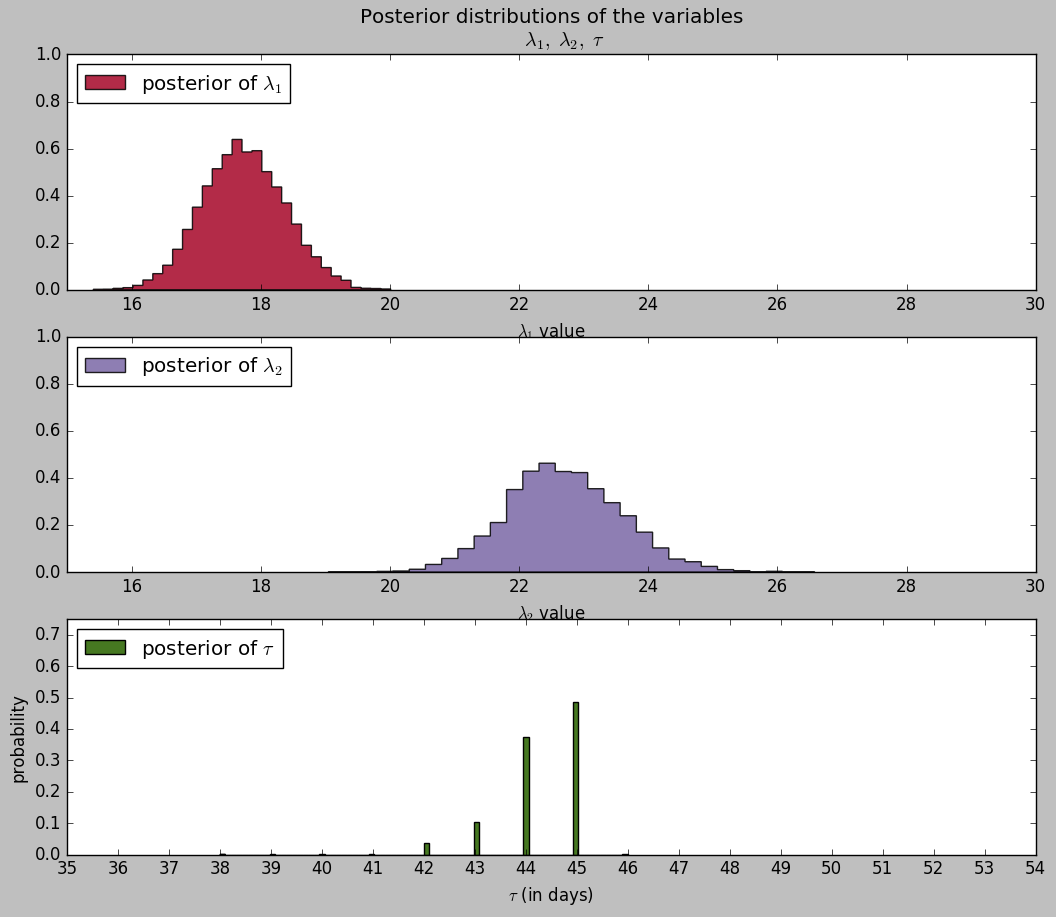

In [27]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

figsize(12.5, 10)

n_count_data = len(count_data)

# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

In [28]:
lambda_1_samples.mean()

17.738598355888286